In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import anndata as ad

In [3]:
adata = ad.read_h5ad('/home/mhassan/R_Projects/scAtlas/Analysis/Vascular/Objects/Vascular_IntegratedObj_label_transferred_from_SubECs_updated_names.h5ad')
adata

AnnData object with n_obs × n_vars = 68503 × 47372
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Mt', 'Rb', 'Mt_Rb', 'Condition', 'sex', 'Chemistry', 'technology', 'Study', 'BMI', 'Age', 'Emont_Annotation', 'BMI.1', 'Study_chemistry', 'S.Score', 'G2M.Score', 'Phase', 'samples', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'seurat_clusters', 'annotation_heatmap', 'Venous.ECs_signature', 'Arterial.ECs_signature', 'Capillary.ECs_signature', 'Pericytes_signature', 'VSMCs_signature', 'Lymphatic.ECs_signature', 'SubECs_signature', 'Vascular_labels', 'transferred_labels_from_SubECs'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_harmony', 'X_pca', 'X_umap'

In [4]:
# import dependencies
import os
import numpy as np
import pandas as pd
import scanpy as sc
import loompy as lp

In [5]:
import json
import zlib
import base64

# collect SCENIC AUCell output
lf = lp.connect("/home/mhassan/GenomeDK/endoCellAtlas/scenic/pyscenic/scenic_vascular_output.loom", mode='r+', validate=False )


In [6]:
# scenic output
meta = json.loads(zlib.decompress(base64.b64decode( lf.attrs.MetaData )))
exprMat = pd.DataFrame( lf[:,:], index=lf.ra.Gene, columns=lf.ca.CellID).T
auc_mtx = pd.DataFrame( lf.ca.RegulonsAUC, index=lf.ca.CellID)

In [13]:
# Read the auc matrix
# auc_mtx = pd.read_csv('/home/lucamannino/scenicplus/auc_matrix.csv', index_col = 0)

In [7]:
auc_mtx

,ARID5B(+),ATF3(+),ATF6(+),BACH1(+),BACH2(+),BCL3(+),BCLAF1(+),BHLHE40(+),BPTF(+),CEBPB(+),...,TCF7L2(+),TEAD1(+),TEAD4(+),TFAP2A(+),THRA(+),USF2(+),XBP1(+),YY1(+),ZBTB7A(+),ZNF467(+)
GTTACAGGTATGGTAA-1_1_1,0.197162,0.051453,0.220485,0.501912,0.128430,0.000000,0.097046,0.000000,0.051141,0.039785,...,0.230387,0.334412,0.091858,0.006068,0.024333,0.032816,0.004193,0.033522,0.026834,0.036806
ACGTTCCTCCCTCTTT-1_1_1,0.359418,0.047312,0.241855,0.523204,0.052589,0.000000,0.087010,0.000000,0.044308,0.052061,...,0.182235,0.260916,0.025655,0.071866,0.015766,0.031821,0.003363,0.032422,0.029593,0.029245
TCAAGTGCATCTATCT-1_1_1,0.234146,0.051950,0.236213,0.479478,0.053187,0.013423,0.099914,0.013592,0.056389,0.000000,...,0.199240,0.279584,0.191337,0.000000,0.021055,0.028319,0.002561,0.033455,0.033576,0.029570
TCCCACATCAGCACCG-1_1_1,0.370166,0.051751,0.209864,0.302895,0.374420,0.020740,0.088060,0.062220,0.043353,0.066783,...,0.496502,0.417288,0.079663,0.224409,0.023078,0.020871,0.068698,0.028737,0.028217,0.014796
CTATAGGGTACATTGC-1_1_1,0.411469,0.047438,0.213278,0.425955,0.036478,0.000000,0.081354,0.000000,0.054699,0.096226,...,0.479226,0.433516,0.058041,0.000000,0.033442,0.023346,0.000000,0.031335,0.028790,0.025408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCGGTCTCCGTGGGT-1_8,0.225509,0.075490,0.198136,0.043267,0.147706,0.074152,0.131303,0.339890,0.078050,0.066466,...,0.247241,0.209230,0.393204,0.243774,0.044611,0.050013,0.036674,0.062335,0.100680,0.083796
TTCTCTCGTAAGAACT-1_8,0.336883,0.074007,0.143965,0.112209,0.080660,0.000000,0.111399,0.000000,0.092916,0.100957,...,0.391968,0.508653,0.165893,0.133548,0.070138,0.046003,0.046920,0.063548,0.057301,0.009341
TTGGTTTCAAATGCTC-1_8,0.264052,0.067073,0.180835,0.098590,0.152631,0.066948,0.135798,0.174251,0.103744,0.045026,...,0.172888,0.302988,0.319685,0.000000,0.041411,0.031184,0.038663,0.063780,0.089842,0.071647
TTGTTTGGTACCTTCC-1_8,0.283242,0.065749,0.170317,0.073536,0.000000,0.000000,0.136059,0.197974,0.117948,0.000000,...,0.502593,0.374279,0.384949,0.091916,0.042208,0.036266,0.020076,0.073409,0.116077,0.036010


In [8]:
import anndata as ad

ad_auc_mtx = ad.AnnData(auc_mtx)
sc.pp.neighbors(ad_auc_mtx, n_neighbors=10, metric="correlation")
sc.tl.umap(ad_auc_mtx)
sc.tl.tsne(ad_auc_mtx)

/home/mhassan/miniconda3/envs/pyscenic/lib/python3.10/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 92 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


In [9]:
adata

AnnData object with n_obs × n_vars = 68503 × 47372
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Mt', 'Rb', 'Mt_Rb', 'Condition', 'sex', 'Chemistry', 'technology', 'Study', 'BMI', 'Age', 'Emont_Annotation', 'BMI.1', 'Study_chemistry', 'S.Score', 'G2M.Score', 'Phase', 'samples', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'seurat_clusters', 'annotation_heatmap', 'Venous.ECs_signature', 'Arterial.ECs_signature', 'Capillary.ECs_signature', 'Pericytes_signature', 'VSMCs_signature', 'Lymphatic.ECs_signature', 'SubECs_signature', 'Vascular_labels', 'transferred_labels_from_SubECs'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_harmony', 'X_pca', 'X_umap'

In [11]:
df = adata.obs.copy()
df

,orig.ident,nCount_RNA,nFeature_RNA,Mt,Rb,Mt_Rb,Condition,sex,Chemistry,technology,...,annotation_heatmap,Venous.ECs_signature,Arterial.ECs_signature,Capillary.ECs_signature,Pericytes_signature,VSMCs_signature,Lymphatic.ECs_signature,SubECs_signature,Vascular_labels,transferred_labels_from_SubECs
GTTACAGGTATGGTAA-1_1_1,SAT9,30630.0,7775,0.018892,0.198363,0.217254,Obese,female,Chromium-v3.1 Single Nucleus,Single Nucleus,...,Endothelial cells,-0.701080,-0.577603,-0.145121,-0.428027,-0.355877,-0.084452,0.450845,SubEndothelial cells,Lymphoid-like Endothelial cells
ACGTTCCTCCCTCTTT-1_1_1,SAT9,26246.0,7102,0.007422,0.241205,0.248627,Obese,female,Chromium-v3.1 Single Nucleus,Single Nucleus,...,Endothelial cells,-0.896666,-0.440225,-0.119439,-0.447448,-0.459399,0.022538,0.657490,SubEndothelial cells,Lymphoid-like Endothelial cells
TCAAGTGCATCTATCT-1_1_1,SAT9,26150.0,6520,0.003748,0.232375,0.236123,Obese,female,Chromium-v3.1 Single Nucleus,Single Nucleus,...,Endothelial cells,-0.266145,-0.262748,-0.043965,-0.478905,-0.396563,-0.042302,0.442860,SubEndothelial cells,Lymphoid-like Endothelial cells
TCCCACATCAGCACCG-1_1_1,SAT9,24663.0,6466,0.067069,0.205152,0.272222,Obese,female,Chromium-v3.1 Single Nucleus,Single Nucleus,...,Endothelial cells,-0.146842,-0.295789,-0.592050,0.162950,0.030594,-0.051586,0.628873,SubEndothelial cells,FAP-like Endothelial cells
CTATAGGGTACATTGC-1_1_1,SAT9,22352.0,6859,0.030175,0.245711,0.275886,Obese,female,Chromium-v3.1 Single Nucleus,Single Nucleus,...,Endothelial cells,-0.369979,-0.620669,-0.629947,0.582582,0.647210,-0.001395,0.405892,SubEndothelial cells,Mesenchymal-like Endothelial cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCGGTCTCCGTGGGT-1_8,Patient21L005039,4187.0,2160,0.045777,0.274662,0.320439,Diabetic Obese,female,Chromium-v3 Single Nucleus,Single Nucleus,...,Endothelial cells,-0.271424,-0.527779,0.403806,-0.312838,-0.331561,-0.163092,-0.374680,Capillary Endothelial cells 1,Capillary Endothelial cells 1
TTCTCTCGTAAGAACT-1_8,Patient21L005039,3548.0,1954,0.109439,0.656635,0.766074,Diabetic Obese,female,Chromium-v3 Single Nucleus,Single Nucleus,...,Mural cells,-0.414835,-0.475242,0.305187,2.016427,0.998390,-0.135821,0.032573,Pericytes,Pericytes
TTGGTTTCAAATGCTC-1_8,Patient21L005039,3431.0,1581,0.028409,0.227273,0.255682,Diabetic Obese,female,Chromium-v3 Single Nucleus,Single Nucleus,...,Endothelial cells,-0.680353,0.143598,0.765356,-0.409661,-0.279399,-0.149634,-0.102138,Capillary Endothelial cells 1,Capillary Endothelial cells 1
TTGTTTGGTACCTTCC-1_8,Patient21L005039,4574.0,2078,0.021354,0.341661,0.363015,Diabetic Obese,female,Chromium-v3 Single Nucleus,Single Nucleus,...,Endothelial cells,-0.788196,-0.355313,0.422264,-0.274279,-0.303820,-0.152180,-0.293135,Capillary Endothelial cells 1,Capillary Endothelial cells 1


In [12]:
df['Grouped_Vascular_labels'] = df['Vascular_labels']
df

,orig.ident,nCount_RNA,nFeature_RNA,Mt,Rb,Mt_Rb,Condition,sex,Chemistry,technology,...,Venous.ECs_signature,Arterial.ECs_signature,Capillary.ECs_signature,Pericytes_signature,VSMCs_signature,Lymphatic.ECs_signature,SubECs_signature,Vascular_labels,transferred_labels_from_SubECs,Grouped_Vascular_labels
GTTACAGGTATGGTAA-1_1_1,SAT9,30630.0,7775,0.018892,0.198363,0.217254,Obese,female,Chromium-v3.1 Single Nucleus,Single Nucleus,...,-0.701080,-0.577603,-0.145121,-0.428027,-0.355877,-0.084452,0.450845,SubEndothelial cells,Lymphoid-like Endothelial cells,SubEndothelial cells
ACGTTCCTCCCTCTTT-1_1_1,SAT9,26246.0,7102,0.007422,0.241205,0.248627,Obese,female,Chromium-v3.1 Single Nucleus,Single Nucleus,...,-0.896666,-0.440225,-0.119439,-0.447448,-0.459399,0.022538,0.657490,SubEndothelial cells,Lymphoid-like Endothelial cells,SubEndothelial cells
TCAAGTGCATCTATCT-1_1_1,SAT9,26150.0,6520,0.003748,0.232375,0.236123,Obese,female,Chromium-v3.1 Single Nucleus,Single Nucleus,...,-0.266145,-0.262748,-0.043965,-0.478905,-0.396563,-0.042302,0.442860,SubEndothelial cells,Lymphoid-like Endothelial cells,SubEndothelial cells
TCCCACATCAGCACCG-1_1_1,SAT9,24663.0,6466,0.067069,0.205152,0.272222,Obese,female,Chromium-v3.1 Single Nucleus,Single Nucleus,...,-0.146842,-0.295789,-0.592050,0.162950,0.030594,-0.051586,0.628873,SubEndothelial cells,FAP-like Endothelial cells,SubEndothelial cells
CTATAGGGTACATTGC-1_1_1,SAT9,22352.0,6859,0.030175,0.245711,0.275886,Obese,female,Chromium-v3.1 Single Nucleus,Single Nucleus,...,-0.369979,-0.620669,-0.629947,0.582582,0.647210,-0.001395,0.405892,SubEndothelial cells,Mesenchymal-like Endothelial cells,SubEndothelial cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCGGTCTCCGTGGGT-1_8,Patient21L005039,4187.0,2160,0.045777,0.274662,0.320439,Diabetic Obese,female,Chromium-v3 Single Nucleus,Single Nucleus,...,-0.271424,-0.527779,0.403806,-0.312838,-0.331561,-0.163092,-0.374680,Capillary Endothelial cells 1,Capillary Endothelial cells 1,Capillary Endothelial cells 1
TTCTCTCGTAAGAACT-1_8,Patient21L005039,3548.0,1954,0.109439,0.656635,0.766074,Diabetic Obese,female,Chromium-v3 Single Nucleus,Single Nucleus,...,-0.414835,-0.475242,0.305187,2.016427,0.998390,-0.135821,0.032573,Pericytes,Pericytes,Pericytes
TTGGTTTCAAATGCTC-1_8,Patient21L005039,3431.0,1581,0.028409,0.227273,0.255682,Diabetic Obese,female,Chromium-v3 Single Nucleus,Single Nucleus,...,-0.680353,0.143598,0.765356,-0.409661,-0.279399,-0.149634,-0.102138,Capillary Endothelial cells 1,Capillary Endothelial cells 1,Capillary Endothelial cells 1
TTGTTTGGTACCTTCC-1_8,Patient21L005039,4574.0,2078,0.021354,0.341661,0.363015,Diabetic Obese,female,Chromium-v3 Single Nucleus,Single Nucleus,...,-0.788196,-0.355313,0.422264,-0.274279,-0.303820,-0.152180,-0.293135,Capillary Endothelial cells 1,Capillary Endothelial cells 1,Capillary Endothelial cells 1


In [8]:
adata.obs['Grouped_Vascular_labels'] = adata.obs['Vascular_labels'].replace(
    {
        "Capillary Endothelial cells 1" : "Capillary Endothelial cells",
        "Capillary Endothelial cells 2" : "Capillary Endothelial cells", 
        "Venous Endothelial cells 1" : "Venous Endothelial cells",
        "Venous Endothelial cells 2" : "Venous Endothelial cells",
        "Venous Endothelial cells 3" : "Venous Endothelial cells",
    }
)

/tmp/ipykernel_4191664/3841336659.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs['Grouped_Vascular_labels'] = adata.obs['Vascular_labels'].replace(


In [9]:
adata.obs['Grouped_Vascular_labels']

GTTACAGGTATGGTAA-1_1_1           SubEndothelial cells
ACGTTCCTCCCTCTTT-1_1_1           SubEndothelial cells
TCAAGTGCATCTATCT-1_1_1           SubEndothelial cells
TCCCACATCAGCACCG-1_1_1           SubEndothelial cells
CTATAGGGTACATTGC-1_1_1           SubEndothelial cells
                                     ...             
TTCGGTCTCCGTGGGT-1_8      Capillary Endothelial cells
TTCTCTCGTAAGAACT-1_8                        Pericytes
TTGGTTTCAAATGCTC-1_8      Capillary Endothelial cells
TTGTTTGGTACCTTCC-1_8      Capillary Endothelial cells
TTTGGTTCAGAACGCA-1_8         Venous Endothelial cells
Name: Grouped_Vascular_labels, Length: 68503, dtype: category
Categories (7, object): ['Venous Endothelial cells', 'Capillary Endothelial cells', 'Arterial Endothelial cells', 'SubEndothelial cells', 'Lymphatic Endothelial cells', 'Pericytes', 'VSMCs']

In [30]:
adata.obs['Grouped_Vascular_labels'].unique()

array(['SubEndothelial cells', 'Pericytes', 'Capillary Endothelial cells',
       'Venous Endothelial cells', 'Arterial Endothelial cells',
       'Lymphatic Endothelial cells', 'VSMCs'], dtype=object)

In [10]:
auc_mtx["Grouped_Vascular_labels"] = adata.obs["Grouped_Vascular_labels"]
mean_auc_by_cell_type = auc_mtx.groupby("Grouped_Vascular_labels").mean()

/tmp/ipykernel_4191664/3649792471.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_auc_by_cell_type = auc_mtx.groupby("Grouped_Vascular_labels").mean()


In [11]:
# Convert the matrix to a DataFrame
df = pd.DataFrame(mean_auc_by_cell_type)

# Export to CSV file
df.to_csv('/home/mhassan/auc_matrix_vascular_combined_labels_celltypes.csv', index=True, header=True)

In [32]:
# Convert the matrix to a DataFrame
df = pd.DataFrame(auc_mtx)

# Export to CSV file
df.to_csv('/home/mhassan/auc_matrix_vascular_combined_labels.csv', index=True, header=True)

In [15]:
# Convert the matrix to a DataFrame
df = pd.DataFrame(mean_auc_by_cell_type)

# Export to CSV file
df.to_csv('/home/mhassan/mean_auc_matrix_by_celltype_vascular.csv', index=True, header=True)

In [17]:
top_n = 92
top_tfs = mean_auc_by_cell_type.max(axis=0).sort_values(ascending=False).head(top_n)
mean_auc_by_cell_type_top_n = mean_auc_by_cell_type[
    [c for c in mean_auc_by_cell_type.columns if c in top_tfs]
]

In [18]:
import seaborn as sns

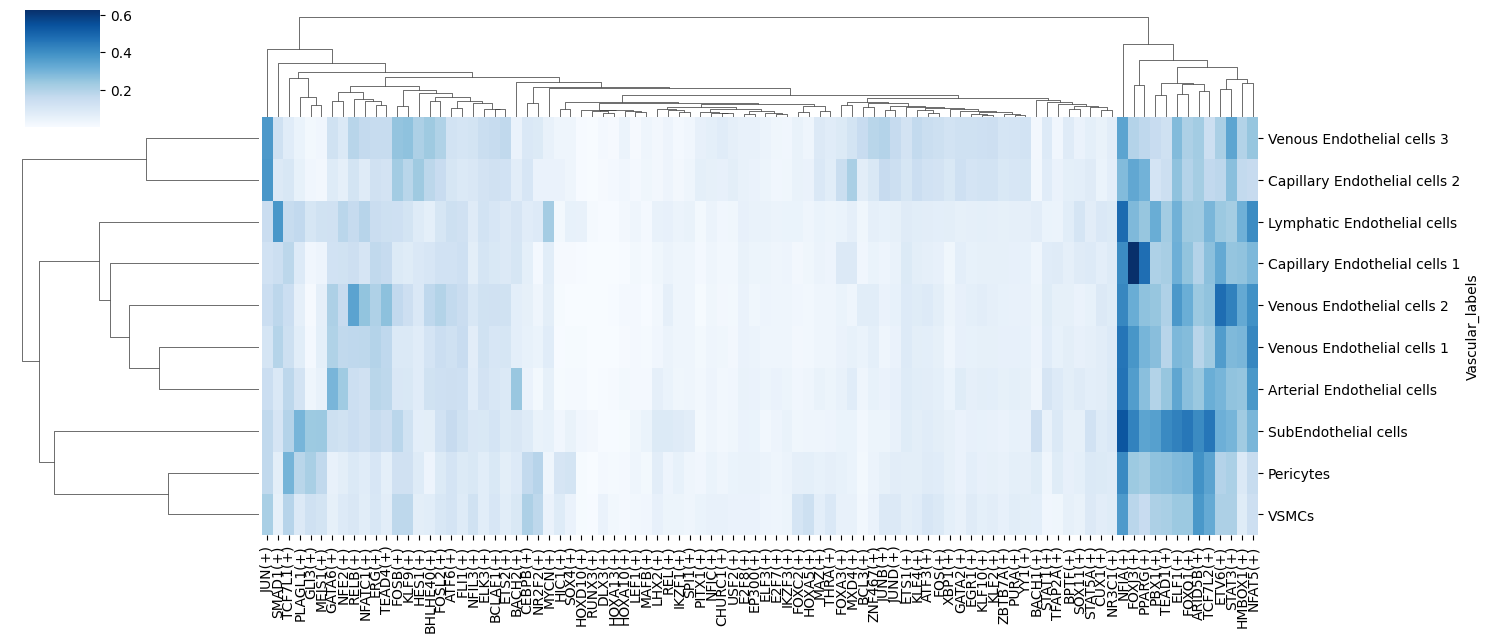

In [19]:
sns.clustermap(
    mean_auc_by_cell_type_top_n,
    figsize=[15, 6.5],
    cmap="Blues",
    xticklabels=True,
    yticklabels=True,
)

In [29]:
tf_names = top_tfs.index.str.replace("(+)", "", regex=False)
adata_top_tfs = adata[:, adata.var_names.isin(tf_names)]

In [30]:
adata_top_tfs

View of AnnData object with n_obs × n_vars = 68503 × 92
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Mt', 'Rb', 'Mt_Rb', 'Condition', 'sex', 'Chemistry', 'technology', 'Study', 'BMI', 'Age', 'Emont_Annotation', 'BMI.1', 'Study_chemistry', 'S.Score', 'G2M.Score', 'Phase', 'samples', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'seurat_clusters', 'annotation_heatmap', 'Venous.ECs_signature', 'Arterial.ECs_signature', 'Capillary.ECs_signature', 'Pericytes_signature', 'VSMCs_signature', 'Lymphatic.ECs_signature', 'SubECs_signature', 'Vascular_labels', 'transferred_labels_from_SubECs'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'Vascular_labels_colors'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'X_umap_aucell', 'X_tsne_aucell'

In [31]:
tf_names

Index(['FOXJ3', 'NFIA', 'ETV6', 'PPARG', 'TCF7L2', 'FOXO1', 'ELF1', 'STAT3',
       'NFAT5', 'TEAD1', 'ARID5B', 'SMAD1', 'JUN', 'PBX1', 'RELB', 'HMBOX1',
       'TCF7L1', 'PLAGL1', 'GATA6', 'TEAD4', 'KLF9', 'NFATC1', 'FOSB', 'BACH2',
       'MEIS1', 'GLI3', 'BHLHE40', 'HES1', 'NFE2', 'MYCN', 'MXD4', 'CEBPB',
       'ERG', 'FOSL2', 'JUNB', 'NR2F2', 'ZNF467', 'ETS2', 'KLF4', 'ATF6',
       'JUND', 'BCLAF1', 'BCL3', 'FLI1', 'ELK3', 'ATF3', 'FOXA3', 'KLF2',
       'BACH1', 'FOS', 'HOXA5', 'KLF10', 'GATA2', 'EGR1', 'NFIL3', 'STAT5A',
       'XBP1', 'YY1', 'ETS1', 'SOX4', 'PURA', 'ZBTB7A', 'SOX11', 'FOXC2',
       'HIC1', 'STAT1', 'MAZ', 'THRA', 'CUX1', 'NR3C1', 'TFAP2A', 'LHX2',
       'REL', 'IKZF1', 'BPTF', 'CHURC1', 'SPI1', 'USF2', 'PITX1', 'NFIC',
       'E2F8', 'EP300', 'HOXD10', 'IKZF3', 'ELF3', 'DLX3', 'E2F7', 'MAFB',
       'HOXA10', 'LEF1', 'HOXA13', 'RUNX3'],
      dtype='object')

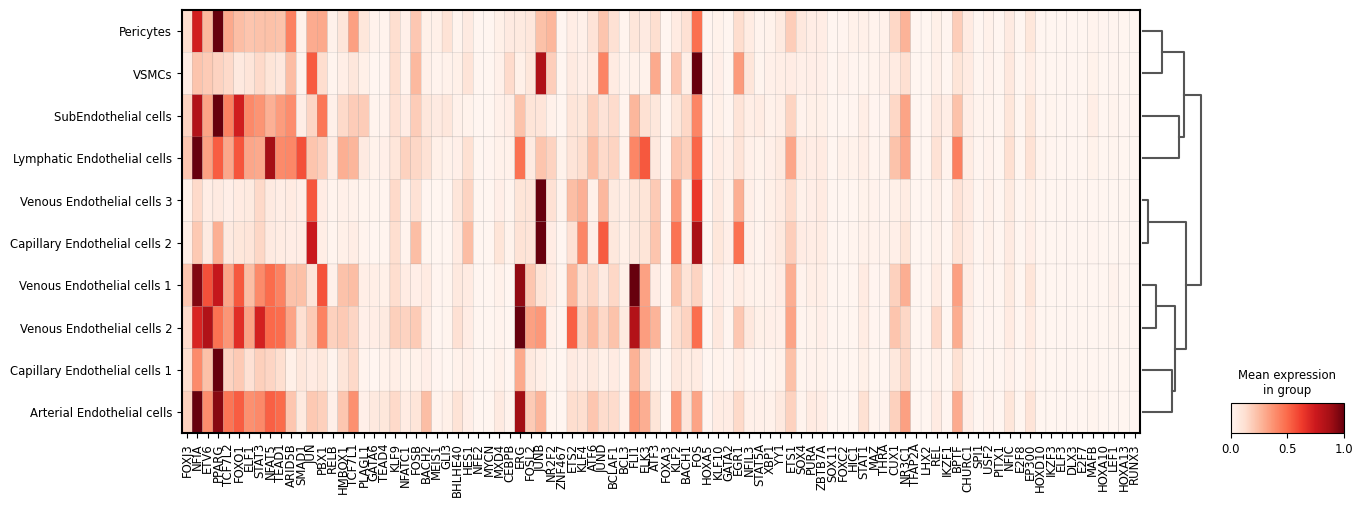

In [32]:
sc.pl.matrixplot(
    adata,
    tf_names,
    groupby="Vascular_labels",
    cmap="Reds",
    dendrogram=True,
    figsize=[15, 5.5],
    standard_scale="group",
)

In [37]:
auc_mtx

,ARID5B(+),ATF3(+),ATF6(+),BACH1(+),BACH2(+),BCL3(+),BCLAF1(+),BHLHE40(+),BPTF(+),CEBPB(+),...,TEAD1(+),TEAD4(+),TFAP2A(+),THRA(+),USF2(+),XBP1(+),YY1(+),ZBTB7A(+),ZNF467(+),Vascular_labels
GTTACAGGTATGGTAA-1_1_1,0.197162,0.051453,0.220485,0.501912,0.128430,0.000000,0.097046,0.000000,0.051141,0.039785,...,0.334412,0.091858,0.006068,0.024333,0.032816,0.004193,0.033522,0.026834,0.036806,SubEndothelial cells
ACGTTCCTCCCTCTTT-1_1_1,0.359418,0.047312,0.241855,0.523204,0.052589,0.000000,0.087010,0.000000,0.044308,0.052061,...,0.260916,0.025655,0.071866,0.015766,0.031821,0.003363,0.032422,0.029593,0.029245,SubEndothelial cells
TCAAGTGCATCTATCT-1_1_1,0.234146,0.051950,0.236213,0.479478,0.053187,0.013423,0.099914,0.013592,0.056389,0.000000,...,0.279584,0.191337,0.000000,0.021055,0.028319,0.002561,0.033455,0.033576,0.029570,SubEndothelial cells
TCCCACATCAGCACCG-1_1_1,0.370166,0.051751,0.209864,0.302895,0.374420,0.020740,0.088060,0.062220,0.043353,0.066783,...,0.417288,0.079663,0.224409,0.023078,0.020871,0.068698,0.028737,0.028217,0.014796,SubEndothelial cells
CTATAGGGTACATTGC-1_1_1,0.411469,0.047438,0.213278,0.425955,0.036478,0.000000,0.081354,0.000000,0.054699,0.096226,...,0.433516,0.058041,0.000000,0.033442,0.023346,0.000000,0.031335,0.028790,0.025408,SubEndothelial cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCGGTCTCCGTGGGT-1_8,0.225509,0.075490,0.198136,0.043267,0.147706,0.074152,0.131303,0.339890,0.078050,0.066466,...,0.209230,0.393204,0.243774,0.044611,0.050013,0.036674,0.062335,0.100680,0.083796,Capillary Endothelial cells 1
TTCTCTCGTAAGAACT-1_8,0.336883,0.074007,0.143965,0.112209,0.080660,0.000000,0.111399,0.000000,0.092916,0.100957,...,0.508653,0.165893,0.133548,0.070138,0.046003,0.046920,0.063548,0.057301,0.009341,Pericytes
TTGGTTTCAAATGCTC-1_8,0.264052,0.067073,0.180835,0.098590,0.152631,0.066948,0.135798,0.174251,0.103744,0.045026,...,0.302988,0.319685,0.000000,0.041411,0.031184,0.038663,0.063780,0.089842,0.071647,Capillary Endothelial cells 1
TTGTTTGGTACCTTCC-1_8,0.283242,0.065749,0.170317,0.073536,0.000000,0.000000,0.136059,0.197974,0.117948,0.000000,...,0.374279,0.384949,0.091916,0.042208,0.036266,0.020076,0.073409,0.116077,0.036010,Capillary Endothelial cells 1


In [59]:
auc_mtx

,ATF3_(+),ATF4_(+),ATF6_(+),BACH1_(+),BPTF_(+),CARF_(+),CCNT2_(+),CEBPA_(+),CEBPB_(+),CEBPG_(+),...,ZNF316_(+),ZNF354C_(+),ZNF384_(+),ZNF426_(+),ZNF454_(+),ZNF594_(+),ZNF630_(+),ZNF668_(+),ZNF683_(+),ZNF699_(+)
GTTACAGGTATGGTAA-1_1_1,0.102980,0.023973,0.427016,0.654759,0.430667,0.055785,0.023287,0.032414,0.089405,0.000000,...,0.020367,0.000000,0.157591,0.000000,0.018732,0.001900,0.000000,0.000000,0.000000,0.000000
ACGTTCCTCCCTCTTT-1_1_1,0.102784,0.014809,0.514462,0.554084,0.237336,0.023639,0.000000,0.000000,0.210300,0.039619,...,0.001495,0.000000,0.032996,0.008925,0.000000,0.042458,0.000000,0.000000,0.035223,0.000809
TCAAGTGCATCTATCT-1_1_1,0.098944,0.060011,0.538320,0.678029,0.396053,0.000000,0.012593,0.000000,0.134656,0.000000,...,0.017412,0.000000,0.179893,0.003709,0.000000,0.021739,0.000000,0.000000,0.012499,0.000000
TCCCACATCAGCACCG-1_1_1,0.109194,0.076544,0.377543,0.420325,0.223195,0.029548,0.000000,0.000000,0.181950,0.020563,...,0.027526,0.000000,0.000000,0.000000,0.009076,0.071197,0.012241,0.000000,0.016885,0.000000
CTATAGGGTACATTGC-1_1_1,0.102196,0.032837,0.470663,0.546486,0.345715,0.084424,0.000000,0.000000,0.131735,0.031538,...,0.025732,0.000000,0.071408,0.000000,0.000000,0.000000,0.005441,0.000000,0.019253,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGGAGAGCATGGAATA-1_8,0.061495,0.117472,0.239341,0.000000,0.000000,0.000000,0.000000,0.084468,0.159595,0.091298,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.078584,0.108672,0.000000,0.000000,0.076509
TGTGGCGGTGGAAGTC-1_8,0.062028,0.044569,0.090941,0.000000,0.230160,0.117576,0.000000,0.030904,0.112520,0.086534,...,0.000000,0.000000,0.000000,0.058750,0.000000,0.076439,0.072792,0.000000,0.000000,0.000000
TTAGGGTCACCTGCGA-1_8,0.168372,0.149237,0.329540,0.320283,0.336323,0.163522,0.000000,0.124436,0.200017,0.057227,...,0.122573,0.232334,0.277262,0.058433,0.266252,0.036619,0.003377,0.114696,0.000000,0.115766
TTCACGCCATTGACCA-1_8,0.083011,0.043918,0.210671,0.245093,0.205044,0.062668,0.000000,0.076715,0.106475,0.220829,...,0.000000,0.176277,0.157380,0.000000,0.000000,0.068559,0.079124,0.000000,0.044651,0.000000


In [60]:
# Convert the matrix to a DataFrame
df = pd.DataFrame(auc_mtx)

# Export to CSV file
df.to_csv('auc_matrix.csv', index=True, header=True)

In [33]:
adata.write('/home/mhassan/vascular_adata_pyscenic_all_done.h5ad')